In [1]:
import numpy as np
import pandas as pd
import os
import tqdm
import pickle
import json

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 6000000

Text(0.5, 1.0, 'Density vs Median Dwell Time (2019 averages)')

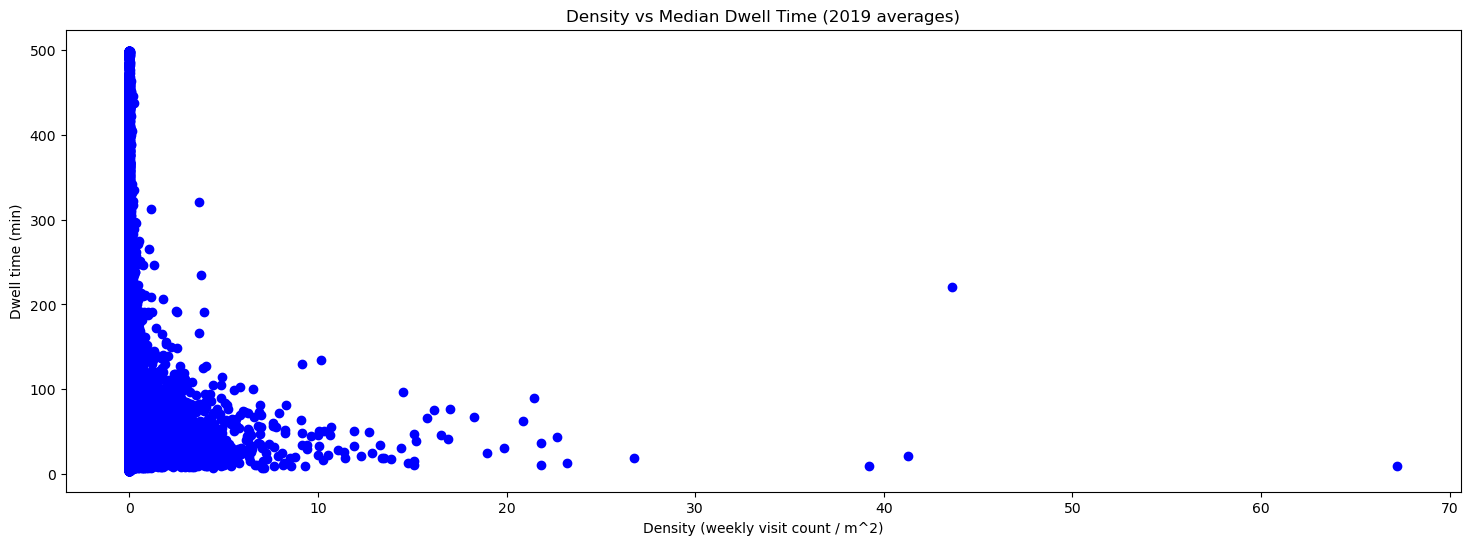

In [66]:
plt.figure(figsize=(18,6))
plt.plot(X.iloc[:,0], X.iloc[:,1], 'bo')
plt.xlabel('Density (weekly visit count / m^2)')
plt.ylabel('Dwell time (min)')
plt.title('Density vs Median Dwell Time (2019 averages)')


Text(0.5, 1.0, 'Density vs Median Dwell Time Log Transform (2019 averages)')

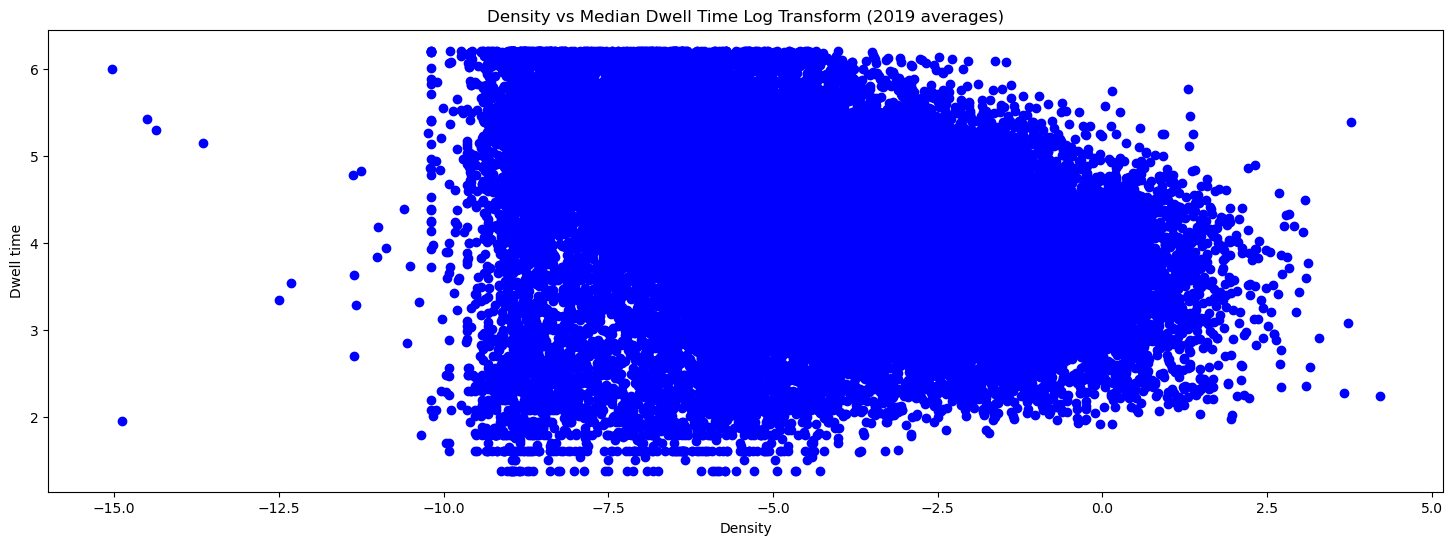

In [137]:
X_log = np.log(X)

plt.figure(figsize=(18,6))
plt.plot(X_log['density'], X_log['median_dwell'], 'bo')
plt.xlabel('Density')
plt.ylabel('Dwell time')
plt.title('Density vs Median Dwell Time Log Transform (2019 averages)')

### Kmeans

In [138]:
from sklearn.cluster import KMeans
from tqdm import tqdm


distortions = []
for K in tqdm(range(2, 15, 1)):
    print(f"Running kmeans for K={K}")
    km = KMeans(
        n_clusters=K, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_log)
    distortions.append(km.inertia_)

  0%|          | 0/13 [00:00<?, ?it/s]

Running kmeans for K=2


  8%|▊         | 1/13 [00:00<00:03,  3.87it/s]

Running kmeans for K=3


 15%|█▌        | 2/13 [00:00<00:04,  2.53it/s]

Running kmeans for K=4


 23%|██▎       | 3/13 [00:01<00:05,  1.88it/s]

Running kmeans for K=5


 31%|███       | 4/13 [00:02<00:08,  1.11it/s]

Running kmeans for K=6


 38%|███▊      | 5/13 [00:03<00:07,  1.08it/s]

Running kmeans for K=7


 46%|████▌     | 6/13 [00:05<00:07,  1.07s/it]

Running kmeans for K=8


 54%|█████▍    | 7/13 [00:06<00:07,  1.22s/it]

Running kmeans for K=9


 62%|██████▏   | 8/13 [00:08<00:06,  1.30s/it]

Running kmeans for K=10


 69%|██████▉   | 9/13 [00:10<00:06,  1.57s/it]

Running kmeans for K=11


 77%|███████▋  | 10/13 [00:13<00:05,  1.90s/it]

Running kmeans for K=12


 85%|████████▍ | 11/13 [00:16<00:04,  2.23s/it]

Running kmeans for K=13


 92%|█████████▏| 12/13 [00:19<00:02,  2.61s/it]

Running kmeans for K=14


100%|██████████| 13/13 [00:22<00:00,  1.77s/it]


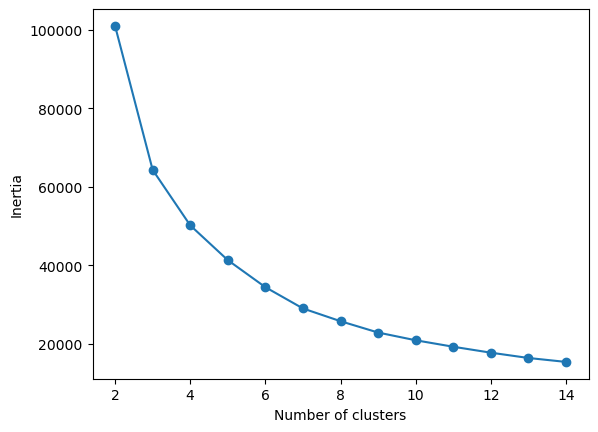

In [140]:
# plot
plt.plot(range(2, 15, 1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.plot(range(2, 15, 1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Inertia

$$
\text{inertia} = \sum_{i=0}^n \min _{\mu_j \in C}\left(\left\|x_i-\mu_j\right\|^2\right)
$$

In [141]:
K_best = 7

km = KMeans(
    n_clusters=K_best,
    init='random',
    random_state=0
)
y_km = km.fit_predict(X_log)

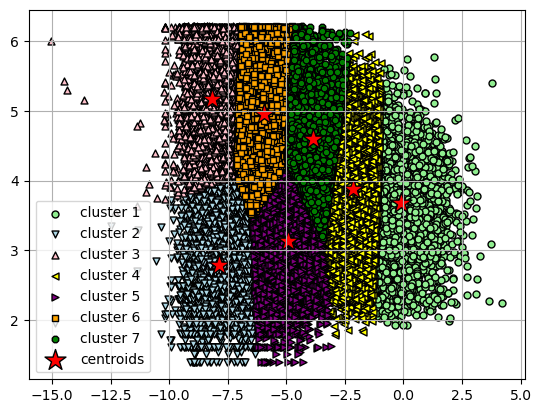

In [143]:
marker = ['o', 'v', '^', '<', '>', 's', '8', 'p']

color = ['lightgreen', 'lightblue', 'pink', 'yellow', 'purple', 'orange', 'green']


for k in range(K_best):
    plt.scatter(
        X_log.loc[y_km == k, 'density'], X_log.loc[y_km == k, 'median_dwell'],
        s=25, c=color[k],
        marker=marker[k], edgecolor='black',
        label=f'cluster {k+1}'
    )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [144]:
df_2019_mean['cluster'] = y_km

In [145]:
df_2019_mean = df_2019_mean.reset_index()

In [146]:
df_2019 = df_2019.merge(df_2019_mean[['node.placekey','cluster']], left_on='node.placekey', right_on='node.placekey')

In [147]:
df_2019.head()

,node.placekey,node.safegraph_core.naics_code,node.safegraph_core.location_name,node.safegraph_core.top_category,node.safegraph_core.sub_category,node.safegraph_geometry.wkt_area_sq_meters,day_0_visits,day_1_visits,day_2_visits,day_3_visits,...,11-20,21-60,61-120,121-240,>240,start,end,density,cluster_x,cluster_y
0,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,5.0,4.0,8.0,6.0,...,19.0,5.0,3.0,3.0,3.0,2019-01-07,2019-01-07,0.647887,2,0
1,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,6.0,7.0,4.0,8.0,...,16.0,6.0,5.0,3.0,4.0,2019-01-14,2019-01-14,0.605634,2,0
2,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,2.0,6.0,8.0,12.0,...,30.0,6.0,4.0,4.0,5.0,2019-01-21,2019-01-21,0.816901,2,0
3,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,5.0,10.0,7.0,5.0,...,13.0,13.0,2.0,5.0,3.0,2019-01-28,2019-01-28,0.690141,2,0
4,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,10.0,6.0,4.0,12.0,...,14.0,5.0,2.0,4.0,5.0,2019-02-04,2019-02-04,0.605634,2,0


In [149]:
df_2019.groupby(['cluster_y','node.safegraph_core.naics_code','node.safegraph_core.top_category','node.safegraph_core.sub_category'])['cluster_y'].count().to_csv('cluster_counts.csv')

In [150]:
len(df_2019['node.placekey'].unique())

32882

In [181]:
df_naics['log_density'] = np.log(df_naics['density'])
df_naics['log_median_dwell'] = np.log(df_naics['median_dwell'])

In [154]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_naics[['log_density','log_median_dwell']])

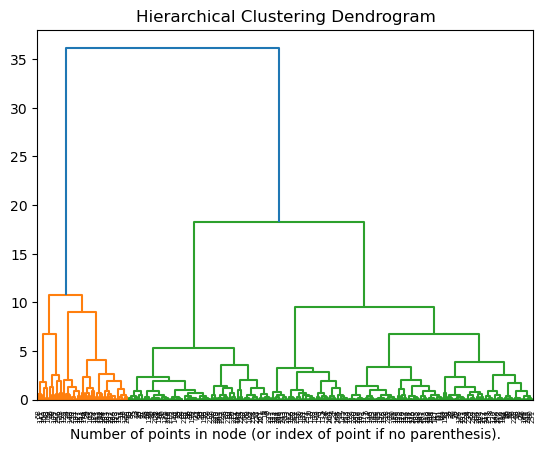

In [162]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [158]:
max(model.labels_)

260

In [166]:
children_df = pd.DataFrame(model.children_)

In [167]:
children_df

,0,1
0,82,89
1,116,237
2,161,250
3,30,108
4,238,242
...,...,...
255,500,512
256,508,514
257,515,516
258,513,517


In [185]:
import plotly.express as px
import plotly.graph_objects as go

In [187]:
fig = go.Figure(data=go.Scatter(x=df_naics['log_density'],
                                y=df_naics['log_median_dwell'],
                                mode='markers',
                                text=df_naics['node.safegraph_core.sub_category'])) # hover text goes here

fig.show()

In [1]:
df_naics.head()

NameError: name 'df_naics' is not defined